<p style="text-align: center;"> <span style="color:firebrick"> <font size="5"> <b> USC Marshall School of Business </b> </font> </p> </span> 

<p style="text-align: center;"> <b> <font font size="5"> DSO 545- Homework 5 </p> </b></font>

<p style="text-align: center;"> <b> Fall 2020 </b> </p>


## <span style="color:blue">  Joyi Bhattacharjee </span>

## <span style="color:firebrick">  Assignment Learning Objectives </span>



- Customize seaborn plots in Python
- Deal with date variables in Python
- Wrangle data in Python

## <span style="color:firebrick"> Dataset </span>

The dataset consists of 3 variables:
    
|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`date`| date of the poll
|`approval`| President's Trump approval rating
|`disapproval`| President's Trump disapproval rating



## <span style="color:firebrick"> Questions </span>


#### 1. Create an EXACT copy of the following graph that shows  Persident's Trump daily approval ratings.

- Each of the red horizontal lines represent the annual average approval ratings in 2017, 2018, 2019, and 2020 respectively
- The line chart is grey in color with alpha = 0.3
- The figure size is 10 x 5



In [1]:
# import necessary packages for this module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv("TrumpRatings.csv",parse_dates = ['date'])
df['year']=df["date"].dt.year
df.head(3)

,date,approve,disapprove,year
0,2017-01-22,45.00,45.0,2017
1,2017-01-23,45.00,46.0,2017
2,2017-01-24,44.05,45.1,2017


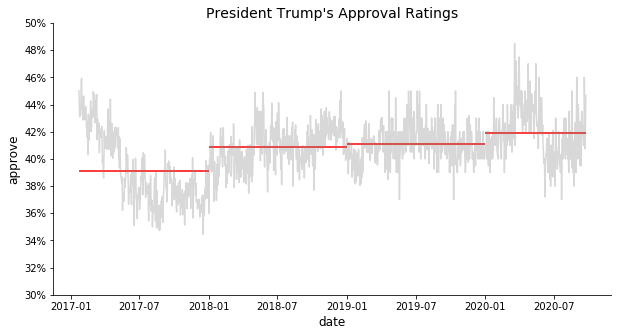

In [186]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df,
x = 'date',
y = 'approve',
color = 'grey',alpha=0.3)
# Add a title to the plot
plt.title("President Trump's Approval Ratings",
loc= 'center', # Could be 'left', 'right', 'center'
fontsize = 14,
pad = 5, # distance above the figure in pixels
color = 'black')
# sns.lineplot(y="Avg approve",x="date",data=df_new, color = 'red')
# Change the default x-axis and y-axis labels
plt.xlabel("date", color = 'black', fontsize = 12)
plt.ylabel("approve", color= 'black', fontsize = 12)
# Change the default x-axis and y-axis tick labels and positions

# Add the mean revenue (vertical) and mean planned revenue (horizontal)
for year in df['year'].unique():
    avg_approve = df[df['year']==year]["approve"].mean()
    xMin=df[df['year']==year]["date"].min()
    xMax=df[df['year']==year]["date"].max()
    plt.hlines(avg_approve, xMin, xMax, color = 'red')

tickpositions = [30,32,34,36,38,40,42,44,46,48,50]
ticklabels = ['30%','32%','34%','36%','38%','40%','42%','44%','46%','48%','50%']
plt.yticks(tickpositions, ticklabels)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)



#### 2. Create an EXACT copy of the following graph that shows the average monthy difference between Persident's Trump approval and disapproval ratings (Disapproval% - Approval%) since he took office in 2017.

- The span area is green colored with alpha = 0.3
- The 2017, 2018, and 2019 lines are grey with alpha = 0.3
- The 2020 line is red
- The annotation text fontsize for the years is 10
- The figure size is 10 x 5



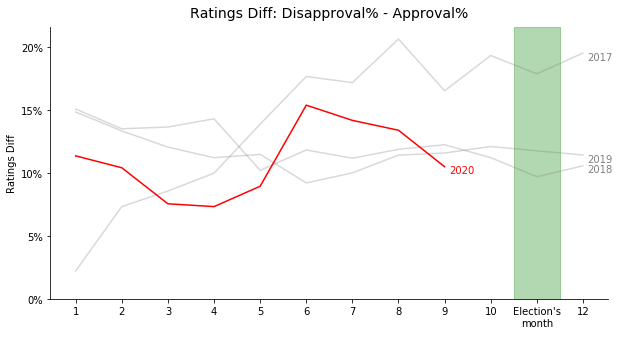

In [185]:
df["month"]=df["date"].dt.month

df["difference"]=df["disapprove"]-df["approve"]

df_agg=df.groupby(["year","month"]).agg({"difference" : "mean"}).reset_index()


plt.figure(figsize=(10,5))

for year in df_agg["year"].unique():
    if year==2020:
        colorUse='red'
        alphaUse=1.0
    else:
        colorUse='grey'
        alphaUse=0.3
    sns.lineplot(data = df_agg[df_agg["year"]==year],
    x = 'month',
    y = 'difference',color=colorUse,
    alpha=alphaUse)
    xend=df_agg[df_agg["year"]==year]["month"].max()
    yend=df_agg[(df_agg["month"]==xend) & (df_agg["year"]==year) ]["difference"]
    
    plt.annotate(year,(xend,yend),fontsize = 10,xytext=(xend+0.1,yend+0.1),
                    ha='left', va='top',color=colorUse)
    
    
    
# Add a title to the plot
plt.title("Ratings Diff: Disapproval% - Approval%",
loc= 'center', # Could be 'left', 'right', 'center'
fontsize = 14,
pad = 10, # distance above the figure in pixels
color = 'black')
# sns.lineplot(y="Avg approve",x="date",data=df_new, color = 'red')
# Change the default x-axis and y-axis labels
plt.xlabel(" ", color = 'black', fontsize = 10)
plt.ylabel("Ratings Diff", color= 'black', fontsize = 10)
# Change the default x-axis and y-axis tick labels and positions
tickpositions = [0,5,10,15,20]
ticklabels = ["0%","5%","10%","15%","20%"]
plt.yticks(tickpositions, ticklabels)

tickpositions_x = range(1,13)
ticklabels_x = ['1','2','3','4','5','6','7','8','9','10',"Election's\nmonth",'12']
plt.xticks(tickpositions_x, ticklabels_x)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axvspan(10.5, 11.5, color = 'green', alpha = 0.3)
